# 前處理-資料清理
1. missing data
    - 平均值、中位數、屆在平均值與標準差之間的亂數
    
2. range差異過大的資料
    - 偵測(identity): PCA
    
    - 處理: 取log e.g. 10^1 => 1, 10^6 => 6
    
4. 資料不一致的問題
    - domain knowledge e.g. 年紀為負的
    
5. 正規化(Normalize)
    - L1 Norm(穩定: 水平調整較少): 
        - $\|𝑥\|_{1𝑖} = \dfrac{𝑥_𝑖}{\sum{|𝑥_𝑖|}}$
    - L2 Norm(強健: 較能對抗outlier): 
        - $\|𝑥\|_{2𝑖}=\dfrac{𝑥_𝑖}{\sqrt{(\sum{𝑥_𝑖^2)}}}$
    - Norm to 0 ~ 1
        - $\|𝑥\|=\dfrac{𝑥_𝑖 - min(x)}{ max(x) - min(x)}$

6. 類別型資料的處理
    - 自然語言(NLP): 先轉成類別型資料
    - onehot encoding
    
| 0 | 1 | 2 |
|---|---|---|
|[1,0,0]|[0,1,0]|[0,0,1]|

7. Feature 產生工具
    - PolynomialFeatures: (𝑋_1, 𝑋_2)=> (1, 𝑋_1, 𝑋_2, 𝑋_1^2, 𝑋_1 𝑋_2, 𝑋_2^2)
    
8. 議題:
    - 請問取log與normalize有什麼差別?
    
    
    
    
    

# IMPORT & DATA


In [132]:
import os             # for directory & file operation
import re             # for text detection
import pandas as pd   # excel in python
import numpy as np    # matrix operation
from collections import Counter     # count num for each items in the list
from sklearn import preprocessing   # Normalize, OneHotEncoding, PolynomialFeatures

# PCA calculation & Drawing
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA


In [2]:
os.listdir()

['.ipynb_checkpoints',
 '02_PreProcessing.pptx',
 'imgs',
 'lb.pkl',
 'main02.ipynb',
 'practice02_0726.ipynb',
 'test.csv',
 'train.csv',
 'Untitled.ipynb']

In [3]:
os.path.isfile(r'C:\Users\Student\Downloads\fig.png')

True

In [4]:
os.path.isdir(r'C:\Users\Student\Downloads')    
root_dir = (r'C:\Users\Student\Downloads')
png_fp = os.path.join(root_dir, 'fig.png')
print(png_fp)
os.path.isfile(png_fp)

# print('C:\\Users\\Student\\Downloads\\fig.png')

C:\Users\Student\Downloads\fig.png


True

In [5]:
# os.listdir
# os.path.join
# os.path.isdir
# os.path.isfile
# os.remve
# os.mkdir

In [6]:
from datetime import datetime

In [7]:
str(datetime.now())

'2020-07-27 19:04:36.209006'

In [8]:
print(str(datetime.now()))
re.findall('\:\d\d\.',str(datetime.now()))     

2020-07-27 19:04:36.214990


[':36.']

In [9]:
re.findall('\-\d\d-',str(datetime.now()))

['-07-']

In [10]:
os.listdir()

['.ipynb_checkpoints',
 '02_PreProcessing.pptx',
 'imgs',
 'lb.pkl',
 'main02.ipynb',
 'practice02_0726.ipynb',
 'test.csv',
 'train.csv',
 'Untitled.ipynb']

In [133]:
with open('train.csv', 'r', encoding='utf8') as f:
    for line in f:
        print(line.split(','))

['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked\n']
['1', '0', '3', '"Braund', ' Mr. Owen Harris"', 'male', '22', '1', '0', 'A/5 21171', '7.25', '', 'S\n']
['2', '1', '1', '"Cumings', ' Mrs. John Bradley (Florence Briggs Thayer)"', 'female', '38', '1', '0', 'PC 17599', '71.2833', 'C85', 'C\n']
['3', '1', '3', '"Heikkinen', ' Miss. Laina"', 'female', '26', '0', '0', 'STON/O2. 3101282', '7.925', '', 'S\n']
['4', '1', '1', '"Futrelle', ' Mrs. Jacques Heath (Lily May Peel)"', 'female', '35', '1', '0', '113803', '53.1', 'C123', 'S\n']
['5', '0', '3', '"Allen', ' Mr. William Henry"', 'male', '35', '0', '0', '373450', '8.05', '', 'S\n']
['6', '0', '3', '"Moran', ' Mr. James"', 'male', '', '0', '0', '330877', '8.4583', '', 'Q\n']
['7', '0', '1', '"McCarthy', ' Mr. Timothy J"', 'male', '54', '0', '0', '17463', '51.8625', 'E46', 'S\n']
['8', '0', '3', '"Palsson', ' Master. Gosta Leonard"', 'male', '2', '3', '1', '349909', '21.075

In [134]:
pd.read_csv('train.csv')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [135]:
df = pd.read_csv('train.csv')

In [136]:
type(df)  # DataFrame

pandas.core.frame.DataFrame

In [137]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [16]:
df.columns  # call columns
df['Survived']   #indixing all reow for a specific column
df[['PassengerId', 'Survived']]   #indexing all reows for specific columns
df.loc[10]     # indexing all comumns for a specific row

PassengerId                                 11
Survived                                     1
Pclass                                       3
Name           Sandstrom, Miss. Marguerite Rut
Sex                                     female
Age                                          4
SibSp                                        1
Parch                                        1
Ticket                                 PP 9549
Fare                                      16.7
Cabin                                       G6
Embarked                                     S
Name: 10, dtype: object

In [17]:
df.loc[10:12]    # indexing all colunm for specific rows
df.loc[10:12, ['PassengerId', 'Survived']]     #indexing both columns and rows

,PassengerId,Survived
10,11,1
11,12,1
12,13,0


In [18]:
df.loc[4, ['PassengerId', 'Survived']]

PassengerId    5
Survived       0
Name: 4, dtype: object

In [19]:
df[['PassengerId', 'Survived']] 

,PassengerId,Survived
0,1,0
1,2,1
2,3,1
3,4,1
4,5,0
...,...,...
886,887,0
887,888,1
888,889,0
889,890,1


In [20]:
len(df)

891

In [21]:
indexer = [i%2 !=0 for i in range(len(df))]  
df.loc[indexer]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [22]:
columns = ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age']
df[columns]

,PassengerId,Survived,Pclass,Name,Sex,Age
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0
...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0


In [23]:
df.loc[df['Survived'] == 1  ]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [24]:
df.loc[df['Age'] > 30 ]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
873,874,0,3,"Vander Cruyssen, Mr. Victor",male,47.0,0,0,345765,9.0000,NaN,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q


In [25]:
indexer = (df['Survived'] == 1) & (df['Age'] > 30)

In [26]:
for idx, row in df.iterrows():
    print(row)

PassengerId                          1
Survived                             0
Pclass                               3
Name           Braund, Mr. Owen Harris
Sex                               male
Age                                 22
SibSp                                1
Parch                                0
Ticket                       A/5 21171
Fare                              7.25
Cabin                              NaN
Embarked                             S
Name: 0, dtype: object
PassengerId                                                    2
Survived                                                       1
Pclass                                                         1
Name           Cumings, Mrs. John Bradley (Florence Briggs Th...
Sex                                                       female
Age                                                           38
SibSp                                                          1
Parch                                                 

Name: 292, dtype: object
PassengerId                    294
Survived                         0
Pclass                           3
Name           Haas, Miss. Aloisia
Sex                         female
Age                             24
SibSp                            0
Parch                            0
Ticket                      349236
Fare                          8.85
Cabin                          NaN
Embarked                         S
Name: 293, dtype: object
PassengerId                 295
Survived                      0
Pclass                        3
Name           Mineff, Mr. Ivan
Sex                        male
Age                          24
SibSp                         0
Parch                         0
Ticket                   349233
Fare                     7.8958
Cabin                       NaN
Embarked                      S
Name: 294, dtype: object
PassengerId                  296
Survived                       0
Pclass                         1
Name           Lewy, M

Name: 597, dtype: object
PassengerId                  599
Survived                       0
Pclass                         3
Name           Boulos, Mr. Hanna
Sex                         male
Age                          NaN
SibSp                          0
Parch                          0
Ticket                      2664
Fare                       7.225
Cabin                        NaN
Embarked                       C
Name: 598, dtype: object
PassengerId                                             600
Survived                                                  1
Pclass                                                    1
Name           Duff Gordon, Sir. Cosmo Edmund ("Mr Morgan")
Sex                                                    male
Age                                                      49
SibSp                                                     1
Parch                                                     0
Ticket                                             PC 17485
Fare          

In [27]:
indexer = []
for idx, row in df.iterrows():
    if 'Mr' in row['Name']:
        indexer.append(True)
        print(row['Name'])
    else:
        indexer.append(False)
        

Braund, Mr. Owen Harris
Cumings, Mrs. John Bradley (Florence Briggs Thayer)
Futrelle, Mrs. Jacques Heath (Lily May Peel)
Allen, Mr. William Henry
Moran, Mr. James
McCarthy, Mr. Timothy J
Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
Nasser, Mrs. Nicholas (Adele Achem)
Saundercock, Mr. William Henry
Andersson, Mr. Anders Johan
Hewlett, Mrs. (Mary D Kingcome) 
Williams, Mr. Charles Eugene
Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)
Masselmani, Mrs. Fatima
Fynney, Mr. Joseph J
Beesley, Mr. Lawrence
Sloper, Mr. William Thompson
Asplund, Mrs. Carl Oscar (Selma Augusta Emilia Johansson)
Emir, Mr. Farred Chehab
Fortune, Mr. Charles Alexander
Todoroff, Mr. Lalio
Spencer, Mrs. William Augustus (Marie Eugenie)
Wheadon, Mr. Edward H
Meyer, Mr. Edgar Joseph
Holverson, Mr. Alexander Oskar
Mamee, Mr. Hanna
Cann, Mr. Ernest Charles
Ahlin, Mrs. Johan (Johanna Persdotter Larsson)
Turpin, Mrs. William John Robert (Dorothy Ann Wonnacott)
Kraeff, Mr. Theodor
Rogers, Mr. William John
Lennon

In [28]:
# version 1
def apply_fun(row):
    if 'Mr' in ['Name']:
        return True
    else:
        return False
df.apply(apply_fun, axis=1)

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Length: 891, dtype: bool

In [29]:
# version 2
def apply_fun(row):
    return 'Mr' in row["Name"] 
df.apply(apply_fun, axis =1)

0       True
1       True
2      False
3       True
4       True
       ...  
886    False
887    False
888    False
889     True
890     True
Length: 891, dtype: bool

In [30]:
#version 3
apply_fun = lambda row:'Mr' in row['Name']
df.apply(apply_fun, axis =1)

0       True
1       True
2      False
3       True
4       True
       ...  
886    False
887    False
888    False
889     True
890     True
Length: 891, dtype: bool

In [31]:
#version 4
df[df.apply(lambda row:'Mr' in row['Name'], axis =1)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [32]:
df[indexer]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [33]:
df = pd.read_csv('train.csv')

# 請查看df.info()
# 並找出共有幾種型別，以及哪一些欄位有null值
#=============your works starts===============#
df_info = df.info()
#==============your works ends================#

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [34]:
def cal_len(name):
    return len(name)
# df['Name'].apply(cal_len) # 把function apply 到每一個elemebt上
df['Name'].apply(lambda x:len(x))

0      23
1      51
2      22
3      44
4      24
       ..
886    21
887    28
888    40
889    21
890    19
Name: Name, Length: 891, dtype: int64

In [35]:
df['Cabin']

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

df['Cabin'].apply(lambda x:x[0])   # Cabin應為String 但有些有'NaN' 會認為是'float' object

In [36]:
# 請查看df.describe()
# 請透過mean關注每一個變數的scale
#=============your works starts===============#
df_describe = df.describe()   #可以查看表格內的資料情況
#==============your works ends================#
df_describe

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [37]:
#請透過head()查看df的頭5行
#=============your works starts===============#
df_head = df.head(5)
#==============your works ends================#
df_head

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# PREPROCESSING

## Age - Fill in missing values

In [38]:
df['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

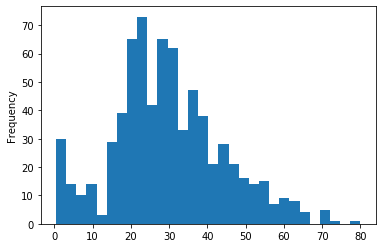

In [39]:
# df['Age'].plot()
df['Age'].plot(kind ='hist', bins = 30 )

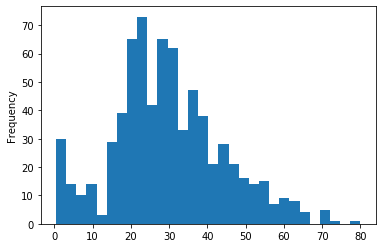

In [40]:
# 查看Age的分布狀況(hint: plot(), kind='hist')
#=============your works starts===============#
age_ax = df['Age'].plot(kind='hist', bins = 30)
#==============your works ends================#

plt.show()

## npNan_None Detection
'''
np.Nan & None Detection 

df['Age'][888] == None => False 
df['Age'][888] is None => False

df['Age'][888] == np.nan => False

df['Age'][888] is np.nan => False

None == None => True
None is None => True
np.nan == np.nan => False
np.nan is np.nan => True
pd.isnull(np.nan) => True
pd.isnull(None) => True
pd.notnull(np.nan) => False
pd.notnull(None) => False
np.isnan(np.nan) => True
np.isnan(None) => ERROR
'''

## mean calculation
```
df['Age'].mean() # pandas default mean 

np.mean(df['Age']) # numpy mean apply on series (exclude nan)
np.mean(df['Age'].values) # numpy mean apply on numpy array (include nan)
np.nanmean(df['Age'].values) # numpy mean apply on numpy array (exclude nan)
np.mean(df.loc[pd.notnull(df['Age']), 'Age']) # numpy mean apply on series exclude nan explicitly
'''

In [41]:
df['Age'].mean()

29.69911764705882

In [42]:
# 作法一: 取平均值
#=============your works starts===============#
avg_age = df['Age'].mean()
#==============your works ends================#


print("avg_age", avg_age) 
# avg_age 29.69911764705882

avg_age 29.69911764705882


In [43]:
# 作法二: 取中位數
#=============your works starts===============#
median_age = df['Age'].median()
#==============your works ends================#


print("median_age", median_age) 
# median_age 28.0

median_age 28.0


In [44]:
pd.isnull(df['Age']).sum()

177

In [45]:
# 作法三: 用相同的分布產生亂數塞入(hint:使用np.random.randint, min: mean - std, max: mean + std)
np.random.seed(1212)
#=============your works starts===============#
std = df['Age'].std()
mean = df['Age'].mean()
size = pd.isnull(df['Age']).sum()
random_age = np.random.randint(mean -std, mean + std, size)
#==============your works ends================#


print("random_age", random_age) 
print("len(random_age)", len(random_age)) 
# random_age [23 41 37 17 31 20 28 24 16 42 33 19 22 20 29 15 32 16 35 40 35 34 26 27
# len(random_age) 177

random_age [23 41 37 17 31 20 28 24 16 42 33 19 22 20 29 15 32 16 35 40 35 34 26 27
 37 28 30 23 31 33 42 30 25 21 29 15 21 16 39 39 21 31 31 37 31 30 23 41
 30 35 33 21 31 28 39 37 31 29 29 40 16 43 20 29 36 22 27 41 32 24 35 23
 29 43 33 43 31 34 34 28 27 40 29 35 27 20 40 37 16 29 29 39 20 17 20 35
 24 42 34 33 26 38 42 31 30 40 34 16 35 16 34 24 43 29 22 29 20 43 29 38
 37 39 35 42 40 19 32 17 25 36 15 26 31 23 19 24 34 39 39 19 17 28 16 35
 20 16 29 18 34 43 16 28 30 42 27 25 36 19 22 43 37 38 30 15 32 38 41 21
 26 33 20 19 21 29 40 30 28]
len(random_age) 177


In [46]:
df['avg_age'] = df['Age']
df.loc[pd.isnull(df['Age']), 'avg_age'] = avg_age
df['median_age'] = df['Age']
df.loc[pd.isnull(df['Age']), 'median_age'] = median_age
df['random_age'] = df['Age']
df.loc[pd.isnull(df['Age']), 'random_age'] = random_age

df.loc[pd.isnull(df['Age']), ['avg_age', 'median_age', 'random_age']].head()

,avg_age,median_age,random_age
5,29.699118,28.0,23.0
17,29.699118,28.0,41.0
19,29.699118,28.0,37.0
26,29.699118,28.0,17.0
28,29.699118,28.0,31.0


the diff between np.nan v.s. None?
    - np.isnan or pd.isnull can be used all the time
    - == None cannot detect np.nan

In [47]:
#1. initial A = [-1,2,-3]
#2. cal L1 norm (no.abx, no.sum)
#3. cal L2 norm 
A = [-1,2,-3]

In [48]:
np.sum(np.abs(A))
A/np.sum(np.abs(A))


array([-0.16666667,  0.33333333, -0.5       ])

In [49]:
np.square(sum(A))
A/np.square(sum(A))

array([-0.25,  0.5 , -0.75])

In [50]:
np.max(A)

2

In [51]:
# X = np.array([1, np.nan, None]).astype(float)
# X == None
# np.isnan(X)

## Age - Normalize
- L1 Normalization: 
    - $|| x ||_1 = \sum_i |x_i| = |x_1| + |x_2| + \ldots + |x_i|$
    - $\|𝑥\|_{1𝑖} = \dfrac{𝑥_𝑖}{\sum{|𝑥_𝑖|}}$
- L2 Normalization: 
    - $|| x ||_2 = \sqrt{\left(\sum_i x_i^2\right)} = \sqrt{x_1^2 + x_2^2 + \ldots + x_i^2}$
    - $\|𝑥\|_{2𝑖}=\dfrac{𝑥_𝑖}{\sqrt{(\sum{𝑥_𝑖^2)}}}$

- difference
![l1_l2_norm](./imgs/l1_l2_norm.png)
![normalize_dif](./imgs/normalize_dif.jpg)

- quote
> L1是蓝色的线，L2是红色的线，很明显，L1的分布对极端值更能容忍。那么如果数据损失项使用L1 Norm，很明显，L1 Norm对outlier没有L2 Norm那么敏感；如果正则化损失项使用L1的话，那么使学习到的参数倾向于稀疏，使用L2 Norm则没有这种倾向。
> 
> 实践中，根据Quaro的data scientist Xavier Amatriain 的经验，实际应用过程中，L1 nrom几乎没有比L2 norm表现好的时候，优先使用L2 norm是比较好的选择。
> 
> 
> 作者：知乎用户
> 链接：https://www.zhihu.com/question/26485586/answer/89215997
> 来源：知乎
> 著作权归作者所有。商业转载请联系作者获得授权，非商业转载请注明出处。

In [52]:
# 請寫出L1 Normaliaze的function
def normalize_l1(X):
    """if type(X) == np.array, and X has two dimensiions"""
    #=============your works starts===============#
    l1_x = np.sum(np.abs(X))
    X = X / l1_x
    #==============your works ends================#
    return X

X = [[ 1., -1.,  2.],
     [ 2.,  0.,  0.],
     [ 0.,  1., -1.]]
X_norm_l1 = normalize_l1(X)
print(X_norm_l1)
# [[ 0.125 -0.125  0.25 ]
#  [ 0.25   0.     0.   ]
#  [ 0.     0.125 -0.125]]

[[ 0.125 -0.125  0.25 ]
 [ 0.25   0.     0.   ]
 [ 0.     0.125 -0.125]]


In [53]:
# 請寫出L2 Normaliaze的function
def normalize_l2(X):
    """if type(X) == np.array, and X has two dimensiions"""
    #=============your works starts===============#
    l2_x = np.sqrt((np.sum(np.square(X))))
    X = X / l2_x
    #==============your works ends================#
    return X

X_norm_l2 = normalize_l2(X)
print(X_norm_l2)
# [[ 0.28867513 -0.28867513  0.57735027]
#  [ 0.57735027  0.          0.        ]
#  [ 0.          0.28867513 -0.28867513]]

[[ 0.28867513 -0.28867513  0.57735027]
 [ 0.57735027  0.          0.        ]
 [ 0.          0.28867513 -0.28867513]]


In [54]:
# 請寫出L2 Normaliaze的function
def normalize_to_01(X):
    """if type(X) == np.array, and X has two dimensiions"""
    #=============your works starts===============#
    min_x = np.min(X)
    max_x = np.max(X)
    X = (X- min_x) /(max_x - min_x)
    #==============your works ends================#
    return X

X_norm_01 = normalize_to_01(X)
print(X_norm_01)
# [[ 0.66666667  0.          1.        ]
#  [ 1.          0.33333333  0.33333333]
#  [ 0.33333333  0.66666667  0.        ]

[[0.66666667 0.         1.        ]
 [1.         0.33333333 0.33333333]
 [0.33333333 0.66666667 0.        ]]


In [55]:
X = [[ 1., -1.,  2.],
     [ 2.,  0.,  0.],
     [ 0.,  1., -1.]]

# 請使用preprocessing.normalize(X, norm='l1')比較，與我們自己寫的normalize function有什麼不同
#=============your works starts===============#
X_normalized_self = normalize_l1(X)    
X_normalized_sklearn = preprocessing.normalize(X, norm='l1')     #每一列獨立執行
#==============your works ends================#

print(X_normalized_self)
print(X_normalized_sklearn)
# sklearn l1_norm
# [[ 0.25 -0.25  0.5 ]
#  [ 1.    0.    0.  ]
#  [ 0.    0.5  -0.5 ]]


[[ 0.125 -0.125  0.25 ]
 [ 0.25   0.     0.   ]
 [ 0.     0.125 -0.125]]
[[ 0.25 -0.25  0.5 ]
 [ 1.    0.    0.  ]
 [ 0.    0.5  -0.5 ]]


In [56]:
print(X)
print(X[:10])
print(X_norm_l1[:10])
print(X_norm_l2[:10])
print(X_norm_01[:10])

[[1.0, -1.0, 2.0], [2.0, 0.0, 0.0], [0.0, 1.0, -1.0]]
[[1.0, -1.0, 2.0], [2.0, 0.0, 0.0], [0.0, 1.0, -1.0]]
[[ 0.125 -0.125  0.25 ]
 [ 0.25   0.     0.   ]
 [ 0.     0.125 -0.125]]
[[ 0.28867513 -0.28867513  0.57735027]
 [ 0.57735027  0.          0.        ]
 [ 0.          0.28867513 -0.28867513]]
[[0.66666667 0.         1.        ]
 [1.         0.33333333 0.33333333]
 [0.33333333 0.66666667 0.        ]]


In [57]:
# X = np.random.normal(size=100000)
# X_norm_l1 = normalize_l1(X)
# X_norm_l2 = normalize_l2(X)
# fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(5, 10))

# ax1.hist(X, bins=60, alpha=0.5, histtype='step', label='X')
# ax2.hist(X_norm_l1, bins=60, alpha=0.5, histtype='step', label='X_norm_l1')
# ax3.hist(X_norm_l2, bins=60, alpha=0.5, histtype='step', label='X_norm_l2')
# plt.show()

In [58]:
avg_age_l1 = normalize_l1(df['avg_age'].values)
avg_age_l2 = normalize_l2(df['avg_age'].values)
avg_age_01 = normalize_to_01(df['avg_age'].values)

df['avg_age_l1'] = avg_age_l1
df['avg_age_l2'] = avg_age_l2
df['avg_age_01'] = avg_age_01

df[['avg_age', 'avg_age_l1', 'avg_age_l2', 'avg_age_01']].head()


,avg_age,avg_age_l1,avg_age_l2,avg_age_01
0,22.0,0.000831,0.022735,0.271174
1,38.0,0.001436,0.039270,0.472229
2,26.0,0.000983,0.026869,0.321438
3,35.0,0.001323,0.036170,0.434531
4,35.0,0.001323,0.036170,0.434531


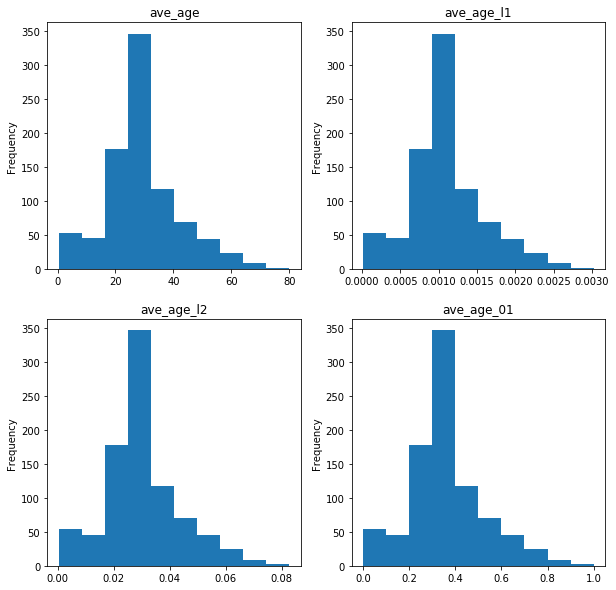

In [59]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10, 10))
df['avg_age'].plot(kind='hist', ax=ax1)
ax1.set_title('ave_age')
df['avg_age_l1'].plot(kind='hist', ax=ax2)
ax2.set_title('ave_age_l1')
df['avg_age_l2'].plot(kind='hist', ax=ax3)
ax3.set_title('ave_age_l2')
df['avg_age_01'].plot(kind='hist', ax=ax4)
ax4.set_title('ave_age_01')
plt.show()

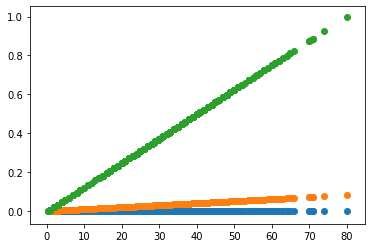

In [60]:
# X = df[['avg_age', 'avg_age_l1']].values
plt.scatter(df['avg_age'], df['avg_age_l1'])
plt.scatter(df['avg_age'], df['avg_age_l2'])
plt.scatter(df['avg_age'], df['avg_age_01'])
plt.show()

## Cabin - NLP category

In [61]:
# 使用Counter 計算個別的item 出現的次數
# 使用item上的dict變成list (可排序)
# sorted對list中的每一個items的第一個Element進行排序
# 設定resverse參數

In [62]:
Counter(df['Cabin']).items()

dict_items([(nan, 687), ('C85', 1), ('C123', 2), ('E46', 1), ('G6', 4), ('C103', 1), ('D56', 1), ('A6', 1), ('C23 C25 C27', 4), ('B78', 1), ('D33', 2), ('B30', 1), ('C52', 2), ('B28', 2), ('C83', 2), ('F33', 3), ('F G73', 2), ('E31', 1), ('A5', 1), ('D10 D12', 1), ('D26', 2), ('C110', 1), ('B58 B60', 2), ('E101', 3), ('F E69', 1), ('D47', 1), ('B86', 1), ('F2', 3), ('C2', 2), ('E33', 2), ('B19', 1), ('A7', 1), ('C49', 1), ('F4', 2), ('A32', 1), ('B4', 1), ('B80', 1), ('A31', 1), ('D36', 2), ('D15', 1), ('C93', 2), ('C78', 2), ('D35', 2), ('C87', 1), ('B77', 2), ('E67', 2), ('B94', 1), ('C125', 2), ('C99', 1), ('C118', 1), ('D7', 1), ('A19', 1), ('B49', 2), ('D', 3), ('C22 C26', 3), ('C106', 1), ('C65', 2), ('E36', 1), ('C54', 1), ('B57 B59 B63 B66', 2), ('C7', 1), ('E34', 1), ('C32', 1), ('B18', 2), ('C124', 2), ('C91', 1), ('E40', 1), ('T', 1), ('C128', 1), ('D37', 1), ('B35', 2), ('E50', 1), ('C82', 1), ('B96 B98', 4), ('E10', 1), ('E44', 2), ('A34', 1), ('C104', 1), ('C111', 1), ('C

In [70]:
sorted((count, idx) for idx, count in Counter(df['Cabin']).items())

[(1, 'A10'),
 (1, 'A14'),
 (1, 'A16'),
 (1, 'A19'),
 (1, 'A20'),
 (1, 'A23'),
 (1, 'A24'),
 (1, 'A26'),
 (1, 'A31'),
 (1, 'A32'),
 (1, 'A34'),
 (1, 'A36'),
 (1, 'A5'),
 (1, 'A6'),
 (1, 'A7'),
 (1, 'B101'),
 (1, 'B102'),
 (1, 'B19'),
 (1, 'B3'),
 (1, 'B30'),
 (1, 'B37'),
 (1, 'B38'),
 (1, 'B39'),
 (1, 'B4'),
 (1, 'B41'),
 (1, 'B42'),
 (1, 'B50'),
 (1, 'B69'),
 (1, 'B71'),
 (1, 'B73'),
 (1, 'B78'),
 (1, 'B79'),
 (1, 'B80'),
 (1, 'B82 B84'),
 (1, 'B86'),
 (1, 'B94'),
 (1, 'C101'),
 (1, 'C103'),
 (1, 'C104'),
 (1, 'C106'),
 (1, 'C110'),
 (1, 'C111'),
 (1, 'C118'),
 (1, 'C128'),
 (1, 'C148'),
 (1, 'C30'),
 (1, 'C32'),
 (1, 'C45'),
 (1, 'C46'),
 (1, 'C47'),
 (1, 'C49'),
 (1, 'C50'),
 (1, 'C54'),
 (1, 'C62 C64'),
 (1, 'C7'),
 (1, 'C70'),
 (1, 'C82'),
 (1, 'C85'),
 (1, 'C86'),
 (1, 'C87'),
 (1, 'C90'),
 (1, 'C91'),
 (1, 'C95'),
 (1, 'C99'),
 (1, 'D10 D12'),
 (1, 'D11'),
 (1, 'D15'),
 (1, 'D19'),
 (1, 'D21'),
 (1, 'D28'),
 (1, 'D30'),
 (1, 'D37'),
 (1, 'D45'),
 (1, 'D46'),
 (1, 'D47'),
 (1, 'D4

In [71]:
sorted([(count, idx) for (idx, count) in Counter(df['Cabin']).items()], reverse = True)

[(687, nan),
 (4, 'G6'),
 (4, 'C23 C25 C27'),
 (4, 'B96 B98'),
 (3, 'F33'),
 (3, 'F2'),
 (3, 'E101'),
 (3, 'D'),
 (3, 'C22 C26'),
 (2, 'F4'),
 (2, 'F G73'),
 (2, 'E8'),
 (2, 'E67'),
 (2, 'E44'),
 (2, 'E33'),
 (2, 'E25'),
 (2, 'E24'),
 (2, 'E121'),
 (2, 'D36'),
 (2, 'D35'),
 (2, 'D33'),
 (2, 'D26'),
 (2, 'D20'),
 (2, 'D17'),
 (2, 'C93'),
 (2, 'C92'),
 (2, 'C83'),
 (2, 'C78'),
 (2, 'C68'),
 (2, 'C65'),
 (2, 'C52'),
 (2, 'C2'),
 (2, 'C126'),
 (2, 'C125'),
 (2, 'C124'),
 (2, 'C123'),
 (2, 'B77'),
 (2, 'B58 B60'),
 (2, 'B57 B59 B63 B66'),
 (2, 'B51 B53 B55'),
 (2, 'B5'),
 (2, 'B49'),
 (2, 'B35'),
 (2, 'B28'),
 (2, 'B22'),
 (2, 'B20'),
 (2, 'B18'),
 (1, 'T'),
 (1, 'F38'),
 (1, 'F G63'),
 (1, 'F E69'),
 (1, 'E77'),
 (1, 'E68'),
 (1, 'E63'),
 (1, 'E58'),
 (1, 'E50'),
 (1, 'E49'),
 (1, 'E46'),
 (1, 'E40'),
 (1, 'E38'),
 (1, 'E36'),
 (1, 'E34'),
 (1, 'E31'),
 (1, 'E17'),
 (1, 'E12'),
 (1, 'E10'),
 (1, 'D9'),
 (1, 'D7'),
 (1, 'D6'),
 (1, 'D56'),
 (1, 'D50'),
 (1, 'D49'),
 (1, 'D48'),
 (1, 'D47'),

In [75]:
sorted(Counter(df['Cabin']).items(), key = lambda x:x[1], reverse = True)

[(nan, 687),
 ('G6', 4),
 ('C23 C25 C27', 4),
 ('B96 B98', 4),
 ('F33', 3),
 ('E101', 3),
 ('F2', 3),
 ('D', 3),
 ('C22 C26', 3),
 ('C123', 2),
 ('D33', 2),
 ('C52', 2),
 ('B28', 2),
 ('C83', 2),
 ('F G73', 2),
 ('D26', 2),
 ('B58 B60', 2),
 ('C2', 2),
 ('E33', 2),
 ('F4', 2),
 ('D36', 2),
 ('C93', 2),
 ('C78', 2),
 ('D35', 2),
 ('B77', 2),
 ('E67', 2),
 ('C125', 2),
 ('B49', 2),
 ('C65', 2),
 ('B57 B59 B63 B66', 2),
 ('B18', 2),
 ('C124', 2),
 ('B35', 2),
 ('E44', 2),
 ('C92', 2),
 ('D20', 2),
 ('E25', 2),
 ('B22', 2),
 ('C68', 2),
 ('C126', 2),
 ('B51 B53 B55', 2),
 ('B5', 2),
 ('B20', 2),
 ('E24', 2),
 ('E8', 2),
 ('E121', 2),
 ('D17', 2),
 ('C85', 1),
 ('E46', 1),
 ('C103', 1),
 ('D56', 1),
 ('A6', 1),
 ('B78', 1),
 ('B30', 1),
 ('E31', 1),
 ('A5', 1),
 ('D10 D12', 1),
 ('C110', 1),
 ('F E69', 1),
 ('D47', 1),
 ('B86', 1),
 ('B19', 1),
 ('A7', 1),
 ('C49', 1),
 ('A32', 1),
 ('B4', 1),
 ('B80', 1),
 ('A31', 1),
 ('D15', 1),
 ('C87', 1),
 ('B94', 1),
 ('C99', 1),
 ('C118', 1),
 ('D7'

In [66]:
df['Cabin'].value_counts()

C23 C25 C27    4
G6             4
B96 B98        4
E101           3
D              3
              ..
D28            1
B73            1
E63            1
C45            1
C104           1
Name: Cabin, Length: 147, dtype: int64

In [67]:
test_arr = ["A", "B", "C"]
enumerate(test_arr)
[i for i in enumerate(test_arr)]

[(0, 'A'), (1, 'B'), (2, 'C')]

In [68]:
dict([item for item in enumerate(test_arr)])

{0: 'A', 1: 'B', 2: 'C'}

In [76]:
# 整理出每一個Cabin的個數並排序(hint:Counter(), sorted())
#=============your works starts===============#
sorted_cabin_counter = sorted(Counter(df['Cabin']).items(), key = lambda x:x[1], reverse = True)
#==============your works ends================#


print(sorted_cabin_counter[:10])
# [('nan', 687), ('G6', 4), ('C23 C25 C27', 4), ('B96 B98', 4), ('F33', 3), ('E101', 3), ('F2', 3), ('D', 3), ('C22 C26', 3), ('C123', 2)]

[(nan, 687), ('G6', 4), ('C23 C25 C27', 4), ('B96 B98', 4), ('F33', 3), ('E101', 3), ('F2', 3), ('D', 3), ('C22 C26', 3), ('C123', 2)]


In [81]:
test_arr = ["A", "B", "C"]

# enumerate的用法: 替test_arr寫上編號，並轉換成dict型別
#=============your works starts===============#
enumerate_res = dict([item for item in enumerate(test_arr)])
enumerate_res_dict = dict([item for item in enumerate(test_arr)])
#==============your works ends================#

print(enumerate_res)

{0: 'A', 1: 'B', 2: 'C'}


In [82]:
enumerate_res.items()

dict_items([(0, 'A'), (1, 'B'), (2, 'C')])

In [87]:
# enumerate_res_dict.items['A'] 
enumerate_res_dict.items()

dict_items([(0, 'A'), (1, 'B'), (2, 'C')])

In [90]:
enumerate_res_dict['A']  # return 0
# enumerate_res_dict[0]  # A為value 但無法取得其key

KeyError: 'A'

In [96]:
# 轉換成Str型別
df["Cabin"].astype(str)

0       nan
1       C85
2       nan
3      C123
4       nan
       ... 
886     nan
887     B42
888     nan
889    C148
890     nan
Name: Cabin, Length: 891, dtype: object

In [98]:
# 用 for loop 找到cabin 中的第一個char
[Cabin[0] for Cabin in df["Cabin"].astype(str)]

['n',
 'C',
 'n',
 'C',
 'n',
 'n',
 'E',
 'n',
 'n',
 'n',
 'G',
 'C',
 'n',
 'n',
 'n',
 'n',
 'n',
 'n',
 'n',
 'n',
 'n',
 'D',
 'n',
 'A',
 'n',
 'n',
 'n',
 'C',
 'n',
 'n',
 'n',
 'B',
 'n',
 'n',
 'n',
 'n',
 'n',
 'n',
 'n',
 'n',
 'n',
 'n',
 'n',
 'n',
 'n',
 'n',
 'n',
 'n',
 'n',
 'n',
 'n',
 'n',
 'D',
 'n',
 'B',
 'C',
 'n',
 'n',
 'n',
 'n',
 'n',
 'B',
 'C',
 'n',
 'n',
 'n',
 'F',
 'n',
 'n',
 'n',
 'n',
 'n',
 'n',
 'n',
 'n',
 'F',
 'n',
 'n',
 'n',
 'n',
 'n',
 'n',
 'n',
 'n',
 'n',
 'n',
 'n',
 'n',
 'C',
 'n',
 'n',
 'n',
 'E',
 'n',
 'n',
 'n',
 'A',
 'D',
 'n',
 'n',
 'n',
 'n',
 'D',
 'n',
 'n',
 'n',
 'n',
 'n',
 'n',
 'n',
 'C',
 'n',
 'n',
 'n',
 'n',
 'n',
 'n',
 'n',
 'B',
 'n',
 'n',
 'n',
 'n',
 'E',
 'D',
 'n',
 'n',
 'n',
 'F',
 'n',
 'n',
 'n',
 'n',
 'n',
 'n',
 'n',
 'D',
 'C',
 'n',
 'B',
 'n',
 'n',
 'n',
 'n',
 'n',
 'n',
 'n',
 'n',
 'F',
 'n',
 'n',
 'C',
 'n',
 'n',
 'n',
 'n',
 'n',
 'n',
 'n',
 'n',
 'n',
 'n',
 'n',
 'n',
 'n',
 'n',
 'E'

In [107]:
#指派到新的變數
new_Cabin = [Cabin[0] for Cabin in df["Cabin"].astype(str)]
new_Cabin

['n',
 'C',
 'n',
 'C',
 'n',
 'n',
 'E',
 'n',
 'n',
 'n',
 'G',
 'C',
 'n',
 'n',
 'n',
 'n',
 'n',
 'n',
 'n',
 'n',
 'n',
 'D',
 'n',
 'A',
 'n',
 'n',
 'n',
 'C',
 'n',
 'n',
 'n',
 'B',
 'n',
 'n',
 'n',
 'n',
 'n',
 'n',
 'n',
 'n',
 'n',
 'n',
 'n',
 'n',
 'n',
 'n',
 'n',
 'n',
 'n',
 'n',
 'n',
 'n',
 'D',
 'n',
 'B',
 'C',
 'n',
 'n',
 'n',
 'n',
 'n',
 'B',
 'C',
 'n',
 'n',
 'n',
 'F',
 'n',
 'n',
 'n',
 'n',
 'n',
 'n',
 'n',
 'n',
 'F',
 'n',
 'n',
 'n',
 'n',
 'n',
 'n',
 'n',
 'n',
 'n',
 'n',
 'n',
 'n',
 'C',
 'n',
 'n',
 'n',
 'E',
 'n',
 'n',
 'n',
 'A',
 'D',
 'n',
 'n',
 'n',
 'n',
 'D',
 'n',
 'n',
 'n',
 'n',
 'n',
 'n',
 'n',
 'C',
 'n',
 'n',
 'n',
 'n',
 'n',
 'n',
 'n',
 'B',
 'n',
 'n',
 'n',
 'n',
 'E',
 'D',
 'n',
 'n',
 'n',
 'F',
 'n',
 'n',
 'n',
 'n',
 'n',
 'n',
 'n',
 'D',
 'C',
 'n',
 'B',
 'n',
 'n',
 'n',
 'n',
 'n',
 'n',
 'n',
 'n',
 'F',
 'n',
 'n',
 'C',
 'n',
 'n',
 'n',
 'n',
 'n',
 'n',
 'n',
 'n',
 'n',
 'n',
 'n',
 'n',
 'n',
 'n',
 'E'

In [ ]:
# test_arr = pd.Series(["A", "B", "C", "A", "D", "F", "B"])
# test_dict = dict([(value, key) for key, value in list(enumerate(sorted(set(test_arr))))])
# test_arr.apply(test_dict.get)

In [118]:
# 取不重複的
set(new_Cabin)
print(set(new_Cabin))

# 轉成可排序的
sorted(list(set(new_Cabin)))

# 列舉
enumerate(sorted(list(set(new_Cabin))))

# 用for loop 展開generator
[(key, value) for (key, value) in enumerate(sorted(list(set(new_Cabin))))]

{'B', 'n', 'E', 'C', 'G', 'A', 'T', 'D', 'F'}


[(0, 'A'),
 (1, 'B'),
 (2, 'C'),
 (3, 'D'),
 (4, 'E'),
 (5, 'F'),
 (6, 'G'),
 (7, 'T'),
 (8, 'n')]

In [119]:
# 把key跟value對調
[(value, key) for (key, value) in enumerate(sorted(list(set(new_Cabin))))]

[('A', 0),
 ('B', 1),
 ('C', 2),
 ('D', 3),
 ('E', 4),
 ('F', 5),
 ('G', 6),
 ('T', 7),
 ('n', 8)]

In [122]:
# 轉換成dict型別
dict([(value, key) for (key, value) in enumerate(sorted(list(set(new_Cabin))))])

# 指派到新的變數
mapping_dict = dict([(value, key) for (key, value) in enumerate(sorted(list(set(new_Cabin))))])
mapping_dict

{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'T': 7, 'n': 8}

In [121]:
print(mapping_dict['A'])

0


In [ ]:
# new_Cabin: 抓出第一個char，轉str，轉小寫 (1.轉換成str型別 2.用apply找到cabin中的第一個char並轉小寫 3.指派到新的變數)
# mapping_dict: 找到每個開頭char所屬的編號 (1.取不重複的 2.轉成可排序的 3.排序 4.列舉 5.用for loop 展開generator
# 6.把key跟value對調 7.轉換成dict型別 8.指派到新的變數) 
# new_Cabin_int: 將char轉換成編號 (1.測試mapping_dict的索引功能('a' => 0) 
#2.用new_Cabin的apply去索引其編號 (lambda, mapping_dict) 3.用values轉換成np.array()型別)

In [123]:
df['Cabin'].astype(str).apply(lambda x:x[0].lower())

0      n
1      c
2      n
3      c
4      n
      ..
886    n
887    b
888    n
889    c
890    n
Name: Cabin, Length: 891, dtype: object

In [124]:
new_Cabin = df['Cabin'].astype(str).apply(lambda x:x[0].lower())
# 測試mapping_dict的索引功能('a' => 0)
mapping_dict = dict([(value, key) for (key, value) in enumerate(sorted(list(set(new_Cabin))))])
print(mapping_dict)
df['Cabin'].astype(str).apply(lambda x:x[0].lower())
#mapping_dict['a']
# 用new_Cabin的apply去索引其編號 (lambda, mapping_dict)
new_Cabin.apply(lambda x:mapping_dict[x]).values
# 用values轉換成np.array()型別



{'a': 0, 'b': 1, 'c': 2, 'd': 3, 'e': 4, 'f': 5, 'g': 6, 'n': 7, 't': 8}


array([7, 2, 7, 2, 7, 7, 4, 7, 7, 7, 6, 2, 7, 7, 7, 7, 7, 7, 7, 7, 7, 3,
       7, 0, 7, 7, 7, 2, 7, 7, 7, 1, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 3, 7, 1, 2, 7, 7, 7, 7, 7, 1, 2, 7, 7, 7,
       5, 7, 7, 7, 7, 7, 7, 7, 7, 5, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       2, 7, 7, 7, 4, 7, 7, 7, 0, 3, 7, 7, 7, 7, 3, 7, 7, 7, 7, 7, 7, 7,
       2, 7, 7, 7, 7, 7, 7, 7, 1, 7, 7, 7, 7, 4, 3, 7, 7, 7, 5, 7, 7, 7,
       7, 7, 7, 7, 3, 2, 7, 1, 7, 7, 7, 7, 7, 7, 7, 7, 5, 7, 7, 2, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 4, 7, 7, 7, 1, 7, 7, 7, 0, 7,
       7, 2, 7, 7, 7, 7, 7, 5, 7, 0, 7, 7, 7, 7, 7, 7, 7, 5, 1, 1, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 6, 7, 7, 7, 0, 7, 7, 7, 7, 7, 3, 7, 7, 3, 7,
       7, 7, 7, 7, 2, 7, 7, 7, 7, 7, 2, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 2, 7, 7, 3, 7, 7, 6, 2, 7, 7, 7, 7, 1, 7, 7, 7, 7, 4, 1,
       7, 7, 7, 7, 2, 2, 7, 7, 7, 2, 7, 3, 7, 7, 7, 7, 7, 7, 7, 7, 0, 7,
       7, 7, 7, 7, 7, 1, 3, 7, 7, 7, 7, 2, 2, 1, 7,

In [125]:
# 抓出第一個char出來分類，並轉成int類別(hint: enumerate)
# new_Cabin: 抓出第一個char，轉str，轉小寫
# mapping_dict: 找到每個開頭char所屬的編號
# new_Cabin_int: 將char轉換成編號
#=============your works starts===============#
# new_Cabin = [carbin[0].lower() for carbun in df['Cabin'].astype(str)]
new_Cabin = df['Cabin'].astype(str).apply(lambda x:x[0].lower())
mapping_dict = dict([(value, key) for (key, value) in enumerate(sorted(list(set(new_Cabin))))])
new_Cabin_int = new_Cabin.apply(lambda x:mapping_dict[x]).values
#==============your works ends================#


print(new_Cabin.values[:10])
print(mapping_dict)
print(new_Cabin_int[:10])
# ['n' 'c' 'n' 'c' 'n' 'n' 'e' 'n' 'n' 'n']
# {'e': 0, 'f': 1, 'd': 2, 't': 3, 'c': 4, 'n': 5, 'b': 6, 'g': 7, 'a': 8}
# [5 4 5 4 5 5 0 5 5 5]

['n' 'c' 'n' 'c' 'n' 'n' 'e' 'n' 'n' 'n']
{'a': 0, 'b': 1, 'c': 2, 'd': 3, 'e': 4, 'f': 5, 'g': 6, 'n': 7, 't': 8}
[7 2 7 2 7 7 4 7 7 7]


In [127]:
df['cabin_cat'] = new_Cabin_int
df[['Cabin', 'cabin_cat']].head()

,Cabin,cabin_cat
0,NaN,7
1,C85,2
2,NaN,7
3,C123,2
4,NaN,7


## Sex - Category

In [130]:
# 請算出Sex共有幾個類別，每一個類別共出現幾次(hint:Counter)
#=============your works starts===============#
counter = Counter(df['Sex'])
#==============your works ends================#


print(counter)
#Counter({'male': 577, 'female': 314})

Counter({'male': 577, 'female': 314})


In [131]:
# 創造出一個與df['Sex']等長的array，並將df['Sex']中的male換成1，female換成0
#=============your works starts===============#
sex_mapping = {'male': 1, 'female' : 0}
sex_cat = df['Sex'].apply(lambda x:sex_mapping[x])
#==============your works ends================#


print("Counter(sex_cat)", Counter(sex_cat))
#Counter(sex_cat) Counter({1: 577, 0: 314})

Counter(sex_cat) Counter({1: 577, 0: 314})


In [141]:
df['sex_cat'] = sex_cat
Counter(df['sex_cat'])

Counter({1: 577, 0: 314})

## Ticket - Category

In [142]:
# 用value_counts計算每一item出現的次數
df['Ticket'].value_counts()

1601               7
347082             7
CA. 2343           7
3101295            6
CA 2144            6
                  ..
28220              1
S.O.P. 1166        1
343095             1
SC/AH Basle 541    1
A/5 2817           1
Name: Ticket, Length: 681, dtype: int64

In [143]:
# 用items 轉成tuple list 型別
df['Ticket'].value_counts().items()

In [144]:
# 用 list 把generator展開 
list(df['Ticket'].value_counts().items())

[('1601', 7),
 ('347082', 7),
 ('CA. 2343', 7),
 ('3101295', 6),
 ('CA 2144', 6),
 ('347088', 6),
 ('S.O.C. 14879', 5),
 ('382652', 5),
 ('2666', 4),
 ('4133', 4),
 ('W./C. 6608', 4),
 ('PC 17757', 4),
 ('LINE', 4),
 ('113760', 4),
 ('19950', 4),
 ('17421', 4),
 ('113781', 4),
 ('349909', 4),
 ('347077', 4),
 ('13502', 3),
 ('SC/Paris 2123', 3),
 ('F.C.C. 13529', 3),
 ('PC 17572', 3),
 ('PC 17760', 3),
 ('347742', 3),
 ('24160', 3),
 ('C.A. 34651', 3),
 ('C.A. 31921', 3),
 ('371110', 3),
 ('PC 17755', 3),
 ('248727', 3),
 ('363291', 3),
 ('29106', 3),
 ('230080', 3),
 ('110152', 3),
 ('110413', 3),
 ('345773', 3),
 ('PC 17582', 3),
 ('35273', 3),
 ('239853', 3),
 ('113776', 2),
 ('STON/O2. 3101279', 2),
 ('PC 17608', 2),
 ('36973', 2),
 ('113798', 2),
 ('231919', 2),
 ('250644', 2),
 ('29750', 2),
 ('19943', 2),
 ('220845', 2),
 ('392096', 2),
 ('A/4 48871', 2),
 ('S.O./P.P. 3', 2),
 ('358585', 2),
 ('111361', 2),
 ('36928', 2),
 ('19877', 2),
 ('239865', 2),
 ('370365', 2),
 ('2661', 

In [ ]:
# 指派到新的變數
sorted_ticket_counter = list(df['Ticket'].value_counts().items())

In [ ]:
# 整理出每一個Ticket的個數並排序(hint:Counter(), sorted())
#=============your works starts===============#
sorted_ticket_counter = list(df['Ticket'].value_counts().items())
#==============your works ends================#

print(sorted_ticket_counter)
# [('110152', 3), ('110413', 3), ('110465', 2), ('110564', 1), ('110813', 1), ('111240', 1), ('111320', 1), ('111361', 2), ('111369', 1),

In [145]:
# ticket
ticket_cat = {}
for ticket in df['Ticket']:
    if ticket.isdigit():
        ticket_cat[ticket] = 1
    elif ticket.startswith('A'):
        ticket_cat[ticket] = 2
    elif ticket.startswith('C'):
        ticket_cat[ticket] = 3
    elif ticket.startswith('F'):
        ticket_cat[ticket] = 4
    elif ticket.startswith('P'):
        ticket_cat[ticket] = 5
    elif ticket.startswith('SOTON'):
        ticket_cat[ticket] = 6
    elif ticket.startswith('STON'):
        ticket_cat[ticket] = 7
    elif ticket.startswith('S'):
        ticket_cat[ticket] = 8
    elif ticket.startswith('W'):
        ticket_cat[ticket] = 9
    else:
        ticket_cat[ticket] = 0
df['ticket_cat'] = df['Ticket'].apply(ticket_cat.get)
print(Counter(df['ticket_cat']))


Counter({1: 661, 5: 65, 3: 47, 8: 30, 2: 29, 7: 18, 6: 17, 9: 13, 4: 7, 0: 4})


## Embarked - Category

In [146]:
df['Embarked']

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [147]:
# 整理出每一個Embarked的個數並排序(hint:Counter(), sorted())
#=============your works starts===============#
sorted_embarked_counter = sorted(dict(Counter(df['Embarked'].astype(str))).items(), key=lambda x:x[0])
#==============your works ends================#

print(sorted_embarked_counter)
# [('C', 168), ('Q', 77), ('S', 644), ('nan', 2)]

[('C', 168), ('Q', 77), ('S', 644), ('nan', 2)]


In [148]:
# 創造embarked的類別對應dict
#=============your works starts===============#
embarked_mapping = dict([(e,i)for i, e in enumerate(set(df['Embarked']))])
#==============your works ends================#


print(embarked_mapping)
#{nan: 0, 'S': 1, 'Q': 2, 'C': 3}

{nan: 0, 'Q': 1, 'S': 2, 'C': 3}


In [149]:
# 轉換embarked為數字類別
#=============your works starts===============#
df['embarked_cat'] =  df['Embarked'].apply(embarked_mapping.get)
#==============your works ends================#

print(Counter(df['embarked_cat']))
#Counter({1: 644, 3: 168, 2: 77, 0: 2})

Counter({2: 644, 3: 168, 1: 77, 0: 2})


dict[key] v.s. dict.get(key)
    - get 可以設定第二個參數，找不到這個key要回傳的值，default=None
    - []索引如果找不到key，會跳error

In [ ]:
# X = np.array([1, np.nan, None]).astype(float)
# X == None
# np.isnan(X)

## Name - NLP category

In [ ]:
# re.findall('\-\d\d-', str(datetime))

In [150]:
# re.findall()的使用方法
test_str = 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)'
test_str1 = 'St. Clumbia (Dother Thier)'

# 請取出「(」、「)」中的文字
#=============your works starts===============#
pattern = '\(.*?\)'
sub_str = re.findall(pattern, test_str)
sub_str1 =  re.findall(pattern, test_str1)
#==============your works ends================#

print(sub_str)
print(sub_str1)
# ['(Florence Briggs Thayer)']
# ['(Dother Thier)']

['(Florence Briggs Thayer)']
['(Dother Thier)']


In [ ]:
# 1. 用re.findall找到所有在","以及"."的詞
# 2. 所引出第零的詞
# 3. 用replace拿掉","以及"."

In [151]:
# 請找到位在","以及"."之間的所有字並將" ", ".", ","去掉(hint: re.findall(), str.replace())
def find_call(name):
    #=============your works starts===============#
    name = re.findall('\,.+?\.', name)[0].replace(',', '').replace('.', '').replace(' ', '')
    #==============your works ends================#
    return name 

title_cat_series = df['Name'].apply(find_call)
print(title_cat_series.values[:10])
#['Mr' 'Mrs' 'Miss' 'Mrs' 'Mr' 'Mr' 'Mr' 'Master' 'Mrs' 'Mrs']

['Mr' 'Mrs' 'Miss' 'Mrs' 'Mr' 'Mr' 'Mr' 'Master' 'Mrs' 'Mrs']


In [153]:
title_mapping= {
    'Ms':"Miss",
    'Mlle':"Miss",
    'Miss':"Miss",
    'Mrs':"Mrs",
    'Mme':"Mrs",
    'MrsMartin(ElizabethL':"Mrs",
    'Mr':"Mr"
    }

title_cat = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

def process_title(call):
    if title_cat.get(call):
        return title_cat.get(call)
    else:
        return title_cat.get(title_mapping.get(call, "Rare"))

df['title_cat'] = title_cat_series.apply(process_title) 
print(Counter(df['title_cat']))


Counter({1: 517, 2: 185, 3: 126, 4: 40, 5: 23})


## Title - Length

In [154]:
# df['Name'].apply(lambda x:len(x))
#def cal_len(x):
#    return len(x)
df['Name'].apply(len)   

0      23
1      51
2      22
3      44
4      24
       ..
886    21
887    28
888    40
889    21
890    19
Name: Name, Length: 891, dtype: int64

In [155]:
# 算出df['Name']中每一個名字的長度並放進一個array
#=============your works starts===============#
name_length = df['Name'].apply(len)   
#==============your works ends================#

print(Counter(pd.cut(name_length, bins=10, labels=range(10))))
# Counter({1: 303, 2: 237, 0: 204, 3: 57, 4: 53, 5: 26, 6: 8, 7: 2, 9: 1})

Counter({1: 303, 2: 237, 0: 204, 3: 57, 4: 53, 5: 26, 6: 8, 7: 2, 9: 1})


In [156]:
df['name_length'] = name_length

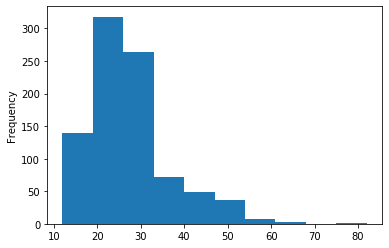

In [157]:
# 劃出每一長度區間次數的長條分布圖(如長度界在10~20之間的有出現約150次)(hint: df[col].plot('hist'))
#!=============your works starts===============!#
df['name_length'].plot(kind='hist')
#!==============your works ends================!#

plt.show()

## Fare - PCA, smooth noisy data, feature generation

In [ ]:
# 1. detect df[c].dtype == np.float64 or df[c].dtype == np.int64, when c = 'Age' or c = 'SibSp' 
# 2. 把==的operator改成in operator
# 3. 寫nested for loop去偵測np.int64或np.float64的欄位，並且篩掉'_cat'結尾的欄位(記得用append)
# 4. 寫成flatten的for loop

In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 17 columns):
PassengerId     891 non-null int64
Survived        891 non-null int64
Pclass          891 non-null int64
Name            891 non-null object
Sex             891 non-null object
Age             714 non-null float64
SibSp           891 non-null int64
Parch           891 non-null int64
Ticket          891 non-null object
Fare            891 non-null float64
Cabin           204 non-null object
Embarked        889 non-null object
sex_cat         891 non-null int64
ticket_cat      891 non-null int64
embarked_cat    891 non-null int64
title_cat       891 non-null int64
name_length     891 non-null int64
dtypes: float64(2), int64(10), object(5)
memory usage: 118.5+ KB


In [159]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'sex_cat', 'ticket_cat',
       'embarked_cat', 'title_cat', 'name_length'],
      dtype='object')

In [160]:
c = 'Age'
C = 'SibSp'
df[c].dtype == np.float64 or df[c].dtype == np.int64
target_columns = []
for c in df.columns:
    if df[c].dtype in [np.float64, np.int64] and not c.endswith('_cat'):
        target_columns.append(c)
target_columns

['PassengerId',
 'Survived',
 'Pclass',
 'Age',
 'SibSp',
 'Parch',
 'Fare',
 'name_length']

In [161]:
[c for c in df.columns if df[c].dtype in [np.float64, np.int64] and not c.endswith('_cat')]

['PassengerId',
 'Survived',
 'Pclass',
 'Age',
 'SibSp',
 'Parch',
 'Fare',
 'name_length']

In [162]:
# 請找出dtype是np.int64或np.float64且名稱不以'_cat'結尾的欄位。
#=============your works starts===============#
number_cols =[c for c in df.columns if df[c].dtype in [np.float64, np.int64] and not c.endswith('_cat')]
#==============your works ends================#


print(number_cols)
# ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'avg_age', 'median_age', 'random_age', 'avg_age_l1', 'avg_age_l2', 'name_length']

['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'name_length']


請參照[這個連結](http://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html#sphx-glr-auto-examples-datasets-plot-iris-dataset-py)，劃出以下這張PCA圖

![PCA_chart](./imgs/PCA.png)

In [163]:
X = df[['Pclass', 'Parch', 'SibSp', 'Fare', 'avg_age', 'name_length']].values
Y = np.array(df['Survived'])

#!=============your works starts===============!#
# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(X)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=Y,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()
#!==============your works ends================!#

plt.show()

KeyError: "['avg_age'] not in index"

In [ ]:
# 請找出標準差最大的欄位['Pclass', 'Parch', 'SibSp', 'Fare', 'avg_age', 'name_length']
#!=============your works starts===============!#

#!==============your works ends================!#


In [ ]:
# # 請找出Fare的平均值(mean)，並填入df['Fare']中
# #=============your works starts===============#
# avg_fare =
# df[pd.isnull(df['Fare'])] =
# #==============your works ends================#
# # df['Fare'].fillna(avg_fare)


# print("avg_fare", avg_fare)
# # 32.204207968574636
# print("number of null of Fare:", len(df[pd.isnull(df['Fare'])]))
# # number of null of Fare: 0

In [ ]:
df[df['Fare'] == 0]

In [ ]:
df.loc[df['Fare'] == 0, 'Fare']

In [ ]:
# 找出Fare==0的row，補上Fare=1
#!=============your works starts===============!#
df.loc[df['Fare'] == 0, 'Fare'] = 1
#!==============your works ends================!#

print("number of Fare equals zero:", len(df[df['Fare']==0]))
# number of Fare equals zero: 0

In [ ]:
# 請算出Fare以10為底的log值
#=============your works starts===============#
fare_log10 = np.log10(df['Fare'].values)
#==============your works ends================#


print(fare_log10[:5])
# [0.86033801 1.8529878  0.89899927 1.72509452 0.90579588]

In [ ]:
df['fare_log10'] = fare_log10
df[['Fare', 'fare_log10']].head()

In [ ]:
df['fare_log10'].describe()

In [ ]:
X = np.matrix(df[['Parch', 'SibSp', 'avg_age', 'fare_log10']])
Y = np.array(df['Survived'])

fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)

X_reduced = PCA(n_components=3).fit_transform(X)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=Y,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("PCA with non-log(Fare)")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()

# 類別型變數onehot encode

1. OneHotEncoding
```
# from sklearn.preprocessing import OneHotEncoder
# [0,1,2] => 
# [
#     [1,0,0],
#     [0,1,0],
#     [0,0,1],
# ]
```
2. sklearn encoder or classifier usage
    1. fit
    2. fit_transform
    3. transform (or predict)

In [ ]:
# 1. initialize OneHotEncoder, named enc
enc = preprocessing.OneHotEncoder()

In [ ]:
# 2. trsform title_cat column in df into shape (891, 1)
df[['title_cat']].shape

In [ ]:
# 3. use enc to fit_transform title_cat
enc.fit_transform(df[['title_cat']])

In [ ]:
# 4. transform sparse matrix into general np.array()
enc.fit_transform(df[['title_cat']]).toarray()

In [ ]:
# 請使用preprocessing.OneHotEncoder()初始化一個encoder
#=============your works starts===============#
enc = preprocessing.OneHotEncoder()
#==============your works ends================#

enc
# OneHotEncoder(categorical_features='all', dtype=<class 'numpy.float64'>,
#        handle_unknown='error', n_values='auto', sparse=True)

In [ ]:
# 請使用enc.fit_transform兩個步驟，onehot encode title_cat
#=============your works starts===============#
title_cat_onehot = enc.fit_transform(df[['title_cat']]).toarray()
#==============your works ends================#

for i in range(10):
    print(df['title_cat'].values[i], title_cat_onehot[i])


In [ ]:
enc = preprocessing.OneHotEncoder()
# 請使用enc.fit_transform兩個步驟，onehot encode embarked_cat
#=============your works starts===============#
embarked_cat_onehot = enc.fit_transform(df[['embarked_cat']].values).toarray()
#==============your works ends================#

embarked_cat_onehot[:3]
# array([[0., 0., 1., 0.],
#        [0., 1., 0., 0.],
#        [0., 0., 1., 0.]])

# PolynomialFeatures

In [ ]:
poly = preprocessing.PolynomialFeatures(degree=2)
# 請利用poly.fit_transform製造出fare_log10的0次項、1次項、2次項，並把0次項拿掉
#=============your works starts===============#
fare_log10_poly =  poly.fit_transform(df[['fare_log10']])[:, 1:]
#==============your works ends================#

print(fare_log10_poly[:2])
# [[0.86033801 0.74018149]
#  [1.8529878  3.43356378]]

In [ ]:
# 請利用poly.fit_transform製造出'fare_log10', 'random_age'的二項次及其一次交成項
#=============your works starts===============#
age_fare_ploy =  poly.fit_transform(df[['fare_log10', 'avg_age_l1']])[:, 1:]
#==============your works ends================#

print(age_fare_ploy[:2])
# [[8.60338007e-01 8.31383556e-04 7.40181486e-01 7.15270871e-04 6.91198616e-07]
#  [1.85298780e+00 1.43602614e-03 3.43356378e+00 2.66093892e-03 2.06217108e-06]]

## Preprocessing Conclude

In [ ]:
df.columns

In [ ]:
X = df[['SibSp', 'Parch', 'avg_age_l2', 'sex_cat', 'name_length', 'fare_log10']].values
X = np.concatenate([X, title_cat_onehot, embarked_cat_onehot, age_fare_ploy], axis=1)
Y = df[['Survived']].values

print(X.shape)
print(Y.shape)

In [ ]:
from sklearn import linear_model
from  sklearn.model_selection import train_test_split


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=1212)

reg = linear_model.LinearRegression()
reg.fit(X_train, Y_train)
predict_prob = reg.predict(X_test)

Y_predict = predict_prob > 0.5 
Y_test = Y_test == 1
acc = np.sum(Y_predict == Y_test)/ len(Y_test)
print("Accuracy:", acc)
